In [ ]:
import pandas as pd
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.filters import hp_filter
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.api import VAR
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv("c://j-works22/works/data/gdp_credit.csv")
x=df['gdp']
y=df['credit']
x=np.log(x)
y=np.log(y)

In [ ]:
b_cycle, b_trend= sm.tsa.filters.hp_filter.hpfilter(x, 1600)
f_cycle, f_trend= sm.tsa.filters.hp_filter.hpfilter(y, 1600)

In [ ]:
# b_cycle.describe()

count    1.240000e+02
mean    -7.069614e-13
std      1.975370e-02
min     -7.935365e-02
25%     -5.678800e-03
50%      1.148901e-03
75%      9.800111e-03
max      4.825870e-02
Name: gdp_cycle, dtype: float64

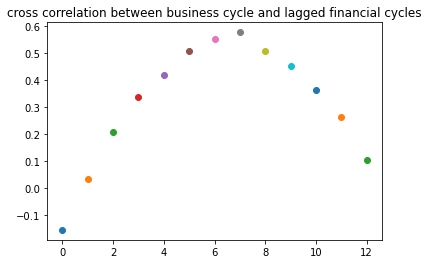

In [ ]:
corr=sm.tsa.stattools.ccf(f_cycle, b_cycle)
# corr=sm.tsa.stattools.ccf(b_cycle, f_cycle)

for i in range(13):
   plt.scatter(i, corr[i])
   
plt.title('cross correlation between business cycle and lagged financial cycles')
plt.show()

In [ ]:
z=np.column_stack((b_cycle, f_cycle))
result=VAR(z).fit(maxlags=10, ic='bic')
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 27, Sep, 2022
Time:                     11:33:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -17.8395
Nobs:                     122.000    HQIC:                  -17.9760
Log likelihood:           766.009    FPE:                1.42109e-08
AIC:                     -18.0694    Det(Omega_mle):     1.31139e-08
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.000042         0.000947            0.044           0.965
L1.y1         1.073370         0.086452           12.416           0.000
L1.y2        -0.110946         0.085403           -1.299           0.194
L2.y1        -0.356947

In [ ]:
granger=result.test_causality('y2', ['y1'], kind='f')
granger.summary()

Test statistic,Critical value,p-value,df
13.48,3.034,0.000,"(2, 234)"
